Get the data and set up the connection from the data base in SQL 

In [2]:
import toml
import os
import pandas as pd 
from sqlalchemy import create_engine

secrets_path = os.path.join("..", "..", ".streamlit", "secrets.toml")
secrets = toml.load(secrets_path)
db_token = secrets["connections"]["databricks"]["access_token"]
server_hostname = secrets["connections"]["databricks"]["server_hostname"]
http_path = secrets["connections"]["databricks"]["http_path"]
catalog_name = "hive_metastore" 
schema_name = "default"

connection_url = (
    f"databricks://token:{db_token}@{server_hostname}?"
    f"http_path={http_path}&catalog={catalog_name}&schema={schema_name}"
)

# 3. Create the engine
engine = create_engine(connection_url)

# 4. Pull your data into a Pandas DataFrame
# Replace 'your_table_name' with the actual name of your Xbox dataset
query = "SELECT * FROM xbox_analysis_data"
final_df = pd.read_sql(query, engine)

print(f"Success! Loaded {len(final_df)} rows.")


[WARN] Parameter '_user_agent_entry' is deprecated; use 'user_agent_entry' instead. This parameter will be removed in the upcoming releases.


Success! Loaded 1102 rows.


In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
final_df.head(10)


,Game,url,ProductID,System,xCloud,Status,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days_avg,rating_30_days_count,rating_7_days_avg,rating_7_days_count,rating_alltime_avg,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,Dec 2025,None,No relation,T,"Vio, Blo, ParNud",26,lunar software,True,raw fury,2025-12-04T15:00:00.0000000Z,4.2,1339,4.2,155,4.0,2102,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,0.055,7.315,1.330,-0.35,0.55,-0.20,3rd Party
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,Dec 2014,74,No relation,T,"MilBlo, MilLan, Vio",15,crystal dynamics,True,crystal dynamics,2014-12-09T00:00:00.0000000Z,3.8,16,3.8,4,3.8,2907,19.99,4072,84,25.00,0.14,0.0,0.0,False,Action-Adventure,18.575,6.425,0.000,0.055,0.085,0.000,0.00,0.00,0.00,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,None,Active,Nov 2025,None,No relation,E10,FanVio,17,minakata dynamics,True,hooded horse,2025-11-06T14:00:00.0000000Z,4.1,17,5.0,1,3.5,195,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,0.000,0.510,0.005,-0.50,1.10,0.20,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,None,Active,Oct 2025,None,No relation,E10,"FanVio, MilBlo, UseAlc",17,super fantasy games,True,hooded horse,2025-10-24T13:00:00.0000000Z,4.0,8,1.0,1,3.7,217,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,0.460,0.000,0.460,0.30,0.00,0.30,3rd Party
4,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,Nov 2022,73,No relation,M,"Blood and Gore, Intense Violence, Strong Language",19,flying wild hog,True,focus entertainment,2022-11-22T05:00:00.0000000Z,3.9,78,4.0,18,3.9,5942,59.99,1180,115,23.08,0.30,0.0,0.1,False,Shooter,20.375,2.705,20.000,0.060,0.240,0.060,0.15,-0.15,0.20,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,Jan 1983,None,No relation,E,MilFanVio,20,xbox game studios,False,xbox game studios,2012-07-27T22:26:23.4565523Z,3.6,130,3.0,32,4.3,110216,0.00,15729,115,24.62,0.03,-0.7,-1.3,False,Puzzle & trivia,24.620,0.000,24.620,0.030,0.000,0.030,-0.70,0.00,-0.70,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,None,Active,Oct 2025,None,No relation,M,"Vio, Blo",23,mainframe industries,True,mainframe industries,2025-10-16T15:00:00.0000000Z,2.6,27,2.7,3,2.0,482,29.99,115,115,11.11,0.62,0.6,0.7,True,RPG,11.110,0.000,27.725,0.020,0.600,0.135,-0.20,0.80,-0.05,3rd Party
7,Baldur's Gate and Baldur's Gate II: Enhanced E...,https://www.xbox.com/en-us/games/store/Baldurs...,9NCNBWZSHZR5,PC,None,Active,Oct 2019,72,No relation,T,"BloGor, UseTob, SugThe, AlcRef, MilLan, ParNud...",27,beamdog,True,beamdog,2019-10-15T04:00:00.0000000Z,3.3,9,0.0,0,3.9,775,49.99,2307,115,0.00,0.00,-0.6,-3.9,False,RPG,11.110,-11.110,0.000,0.020,-0.020,0.000,-0.20,-0.40,-0.25,3rd Party
8,Sopa: Tale of the Stolen Potato,https://www.xbox.com/en-us/games/store/sopa-ta...,9N221ZTFGQB0,Xbox / PC,Yes,Active,Oct 2025,79,No relation,E,,23,"studiobando, inc.",True,"studiobando, inc.",2025-10-07T00:00:00.0000000Z,3.5,29,3.0,6,3.5,451,19.99,115,115,20.69,1.33,0.0,-0.5,True,Action-Adventure,18.575,2.115,27.330,0.055,1.275,0.350,0.00,0.00,0.30,3rd Party
9,Hogwarts Legacy,https://www.xb

In [5]:
final_df.to_csv('db_data.csv',index = False)
final_df_csv = pd.read_csv("db_data.csv")

In [18]:
print(final_df.isna().sum())


Game                                      0
url                                       0
ProductID                                 0
System                                    0
xCloud                                    0
Status                                    0
Removed                                 311
Release                                   0
Metacritic                               25
Series_X_S                                0
ESRB_x                                    0
ESRB_Content_Descriptors                  0
asset_count                               0
developer                                 2
has_gamepass_remediation                  0
publisher                                 2
release_date                              0
rating_30_days_avg                        0
rating_30_days_count                      0
rating_7_days_avg                         0
rating_7_days_count                       0
rating_alltime_avg                        0
rating_alltime_count            

In [17]:
final_df.dtypes 

Game                                     object
url                                      object
ProductID                                object
System                                   object
xCloud                                   object
Status                                   object
Removed                                  object
Release                                  object
Metacritic                               object
Series_X_S                               object
ESRB_x                                   object
ESRB_Content_Descriptors                 object
asset_count                               int64
developer                                object
has_gamepass_remediation                   bool
publisher                                object
release_date                             object
rating_30_days_avg                      float64
rating_30_days_count                      int64
rating_7_days_avg                       float64
rating_7_days_count                     

In [ ]:
columns_drop  = ['is_xpa', 'prices', 'Genre_x', 'Community_Notes', 'lift_vs_rating_momentum','lift_vs_rating_momentum','lift_vs_rating_discovery_capture',
'zscore_discovery_capture', 'lift_vs_rating_quality_retention','zscore_quality_retention', 'zscore_momentum','Removed']
final_df = final_df.drop(columns= columns_drop  )

In [16]:
cols_to_keep = [col for col in final_df.columns if 'RentalCount' not in col and 'PurchaseCount' not in col and 'PlayCount' not in col and 'TimeSpan' not in col]
final_df = final_df[cols_to_keep]

In [39]:
missing_meta = final_df[final_df['Metacritic'].isna()]
missing_meta


,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,lift_vs_rating_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,lift_vs_rating_discovery_capture,zscore_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,lift_vs_rating_quality_retention,zscore_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,None,Dec 2025,None,No relation,T,"Vio, Blo, ParNud",26,lunar software,True,raw fury,2025-12-04T15:00:00.0000000Z,30Days,4.2,0.0,0,1339,7Days,4.2,0.0,0,155,AllTime,4.0,0.0,0,2102,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,None,None,0.055,7.315,1.330,None,None,-0.35,0.55,-0.20,None,None,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,None,Active,None,Nov 2025,None,No relation,E10,FanVio,17,minakata dynamics,True,hooded horse,2025-11-06T14:00:00.0000000Z,30Days,4.1,0.0,0,17,7Days,5.0,0.0,0,1,AllTime,3.5,0.0,0,195,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,None,None,0.000,0.510,0.005,None,None,-0.50,1.10,0.20,None,None,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,None,Active,None,Oct 2025,None,No relation,E10,"FanVio, MilBlo, UseAlc",17,super fantasy games,True,hooded horse,2025-10-24T13:00:00.0000000Z,30Days,4.0,0.0,0,8,7Days,1.0,0.0,0,1,AllTime,3.7,0.0,0,217,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,None,None,0.460,0.000,0.460,None,None,0.30,0.00,0.30,None,None,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,None,Jan 1983,None,No relation,E,MilFanVio,20,xbox game studios,False,xbox game studios,2012-07-27T22:26:23.4565523Z,30Days,3.6,0.0,0,130,7Days,3.0,0.0,0,32,AllTime,4.3,0.0,0,110216,0.00,15729,115,24.62,0.03,-0.7,-1.3,False,Puzzle & trivia,24.620,0.000,24.620,None,None,0.030,0.000,0.030,None,None,-0.70,0.00,-0.70,None,None,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,None,Active,None,Oct 2025,None,No relation,M,"Vio, Blo",23,mainframe industries,True,mainframe industries,2025-10-16T15:00:00.0000000Z,30Days,2.6,0.0,0,27,7Days,2.7,0.0,0,3,AllTime,2.0,0.0,0,482,29.99,115,115,11.11,0.62,0.6,0.7,True,RPG,11.110,0.000,27.725,None,None,0.020,0.600,0.135,None,None,-0.20,0.80,-0.05,None,None,3rd Party
42,ENDLESS Legend 2 (Game Preview),https://www.xbox.com/en-us/games/store/endless...,9NQNRZG07H94,PC,None,Active,None,Sep 2025,None,No relation,T,"Vio, Blo",17,amplitude studios,True,hooded horse,2025-09-22T13:00:00.0000000Z,30Days,3.6,0.0,0,5,7Days,5.0,0.0,0,1,AllTime,3.4,0.0,0,121,49.99,145,145,20.00,0.83,0.2,1.6,True,Strategy,0.000,20.000,0.000,None,None,0.000,0.830,0.000,None,None,-0.50,0.70,-1.30,None,None,3rd Party
46,Caesar III,https://www.xbox.com/en-us/games/store/Caesar-...,9NS76Q8J3FJV,Xbox / PC,Yes,Active,None,Sep 1998,None,No relation,E10,MilVio,25,pix arts,False,pix arts,2019-12-02T06:00:22.6141319Z,30Days,0.0,0.0,0,0,7Days,0.0,0.0,0,0,AllTime,1.0,0.0,0,2,4.99,10007,176,0.00,0.00,-1.0,-1.0,False,Strategy,0.000,0.000,2.940,None,None,0.0

In [47]:
final_df_csv['ESRB_Content_Descriptors'] = final_df_csv['ESRB_Content_Descriptors'].astype(str)


In [49]:
final_df_csv.head(10)

,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,lift_vs_rating_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,lift_vs_rating_discovery_capture,zscore_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,lift_vs_rating_quality_retention,zscore_quality_retention,party_type
0,Routine,https://www.xbox.com/en-us/games/store/routine...,9PCJT6TLCGGV,Xbox,Yes,Active,NaN,Dec 2025,NaN,No relation,T,"Vio, Blo, ParNud",26,lunar software,True,raw fury,2025-12-04T15:00:00.0000000Z,30Days,4.2,0.0,0,1339,7Days,4.2,0.0,0,155,AllTime,4.0,0.0,0,2102,24.99,54,54,11.58,7.37,0.2,0.2,True,Action & adventure,5.790,5.790,11.580,NaN,NaN,0.055,7.315,1.330,NaN,NaN,-0.35,0.55,-0.20,NaN,NaN,3rd Party
1,Lara Croft and the Temple of Osiris,https://www.xbox.com/en-us/games/store/Lara-Cr...,C3553MB4P5TT,Xbox / PC,Yes,Active,NaN,Dec 2014,74,No relation,T,"MilBlo, MilLan, Vio",15,crystal dynamics,True,crystal dynamics,2014-12-09T00:00:00.0000000Z,30Days,3.8,0.0,0,16,7Days,3.8,0.0,0,4,AllTime,3.8,0.0,0,2907,19.99,4072,84,25.00,0.14,0.0,0.0,False,Action-Adventure,18.575,6.425,0.000,NaN,NaN,0.055,0.085,0.000,NaN,NaN,0.00,0.00,0.00,NaN,NaN,3rd Party
2,Whiskerwood,https://www.xbox.com/en-us/games/store/whisker...,9NM2T0DMP4XV,PC,NaN,Active,NaN,Nov 2025,NaN,No relation,E10,FanVio,17,minakata dynamics,True,hooded horse,2025-11-06T14:00:00.0000000Z,30Days,4.1,0.0,0,17,7Days,5.0,0.0,0,1,AllTime,3.5,0.0,0,195,29.99,84,84,5.88,0.51,0.6,1.5,True,Strategy,0.000,5.880,2.940,NaN,NaN,0.000,0.510,0.005,NaN,NaN,-0.50,1.10,0.20,NaN,NaN,3rd Party
3,Super Fantasy Kingdom (Game Preview),https://www.xbox.com/en-us/games/store/super-f...,9MZ8B96NDG1T,PC,NaN,Active,NaN,Oct 2025,NaN,No relation,E10,"FanVio, MilBlo, UseAlc",17,super fantasy games,True,hooded horse,2025-10-24T13:00:00.0000000Z,30Days,4.0,0.0,0,8,7Days,1.0,0.0,0,1,AllTime,3.7,0.0,0,217,19.99,115,115,12.50,0.46,0.3,-2.7,True,Defense,12.500,0.000,12.500,NaN,NaN,0.460,0.000,0.460,NaN,NaN,0.30,0.00,0.30,NaN,NaN,3rd Party
4,Evil West,https://www.xbox.com/en-us/games/store/Evil-We...,9MW581HCJPM6,Xbox / PC,Yes,Active,NaN,Nov 2022,73,No relation,M,"Blood and Gore, Intense Violence, Strong Language",19,flying wild hog,True,focus entertainment,2022-11-22T05:00:00.0000000Z,30Days,3.9,0.0,0,78,7Days,4.0,0.0,0,18,AllTime,3.9,0.0,0,5942,59.99,1180,115,23.08,0.30,0.0,0.1,False,Shooter,20.375,2.705,20.000,NaN,NaN,0.060,0.240,0.060,NaN,NaN,0.15,-0.15,0.20,NaN,NaN,3rd Party
5,Moonsweeper,https://www.xbox.com/en-us/games/store/Microso...,9WZDNCRFHWCN,Xbox / PC,Yes,Active,NaN,Jan 1983,NaN,No relation,E,MilFanVio,20,xbox game studios,False,xbox game studios,2012-07-27T22:26:23.4565523Z,30Days,3.6,0.0,0,130,7Days,3.0,0.0,0,32,AllTime,4.3,0.0,0,110216,0.00,15729,115,24.62,0.03,-0.7,-1.3,False,Puzzle & trivia,24.620,0.000,24.620,NaN,NaN,0.030,0.000,0.030,NaN,NaN,-0.70,0.00,-0.70,NaN,NaN,2nd Party
6,Pax Dei,https://www.xbox.com/en-us/games/store/pax-dei...,9PHGK0538TXM,PC,NaN,Active,NaN,Oct 2025,NaN,No relation,M,"Vio, Blo",23,mainframe industries,True,mainframe industries,2025-10-16T15:00:00.0000000Z,30Days,2.6,0.0,0,27,7Days,2.7,0.0,0,3,AllTime,2.0,0.0,0,482,29.99,115,115,11.11,0.62,0.6,0.7,Tru

In [50]:
final_df_csv['ESRB_Content_Descriptors'].value_counts()

ESRB_Content_Descriptors
nan                                                                                                          138
FanVio                                                                                                        40
MilFanVio                                                                                                     32
Vio, Blo                                                                                                      22
Blo, Vio                                                                                                      19
Vio                                                                                                           17
CarVio                                                                                                        17
Fantasy Violence                                                                                              16
Blood and Gore, Strong Language, Intense Violence                      

In [ ]:
mask = (final_df_csv['ESRB_Content_Descriptors'].isna()) & (final_df_csv['ESRB_x'] == 'E')
final_df_csv.loc[mask, 'ESRB_Content_Descriptors'] = 'No Warnings'




In [35]:
final_df_csv

'No Warnings'

Learning more about the data frame 
- Shape of it 
- How many nulls are in each columns
- Duplicates 
etc 

In [ ]:
final_df.shape


,asset_count,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days_count,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days_count,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention
count,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,19.380218,3.151270,0.0,31.027223,2.231760,0.0,7.736842,3.864065,0.0,8.677820e+03,20.292305,3871.983666,2004.156987,19.470064,0.122695,-0.712795,-1.632305,13.953512,5.516552,14.171715,0.045154,0.077541,0.070989,-0.308711,-0.404083,-0.429492
std,7.849035,1.930235,0.0,408.524314,2.207038,0.0,104.180874,0.606996,0.0,8.971263e+04,22.631477,2375.790637,872.121351,25.013982,0.401601,1.847331,2.121498,13.260938,23.939123,16.403173,0.077921,0.392768,0.246983,0.981001,1.704537,1.200313
min,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000e+00,0.000000,54.000000,54.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-92.860000,0.000000,0.000000,-0.300000,0.000000,-4.500000,-5.150000,-4.600000
25%,14.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.500000,0.0,6.057500e+02,9.990000,2375.750000,1576.000000,0.000000,0.000000,-2.100000,-3.700000,0.000000,-10.605000,0.000000,0.000000,-0.020000,0.000000,-0.300000,-0.800000,-0.600000
50%,18.000000,4.000000,0.0,3.000000,2.000000,0.0,1.000000,4.000000,0.0,1.402000e+03,19.990000,3310.000000,1956.000000,14.290000,0.020000,0.000000,-1.500000,13.640000,0.000000,13.807500,0.020000,0.000000,0.025000,0.000000,0.000000,0.000000
75%,23.000000,4.700000,0.0,13.000000,4.600000,0.0,3.000000,4.300000,0.0,3.845750e+03,24.990000,4651.000000,2572.250000,30.717500,0.140000,0.500000,0.400000,18.575000,12.587500,23.335000,0.055000,0.083750,0.090000,0.100000,0.500000,0.200000
max,81.000000,5.000000,0.0,13385.000000,5.000000,0.0,3429.000000,5.000000,0.0,2.149947e+06,399.990000,16825.000000,4528.000000,100.000000,7.370000,2.700000,2.700000,100.000000,100.000000,100.000000,0.810000,7.315000,7.140000,2.300000,5.000000,2.300000


In [63]:
final_df.describe()

,asset_count,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days_count,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days_count,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention
count,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.0,1.102000e+03,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,19.380218,3.151270,0.0,31.027223,2.231760,0.0,7.736842,3.864065,0.0,8.677820e+03,20.292305,3871.983666,2004.156987,19.470064,0.122695,-0.712795,-1.632305,13.953512,5.516552,14.171715,0.045154,0.077541,0.070989,-0.308711,-0.404083,-0.429492
std,7.849035,1.930235,0.0,408.524314,2.207038,0.0,104.180874,0.606996,0.0,8.971263e+04,22.631477,2375.790637,872.121351,25.013982,0.401601,1.847331,2.121498,13.260938,23.939123,16.403173,0.077921,0.392768,0.246983,0.981001,1.704537,1.200313
min,5.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000e+00,0.000000,54.000000,54.000000,0.000000,0.000000,-5.000000,-5.000000,0.000000,-92.860000,0.000000,0.000000,-0.300000,0.000000,-4.500000,-5.150000,-4.600000
25%,14.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.500000,0.0,6.057500e+02,9.990000,2375.750000,1576.000000,0.000000,0.000000,-2.100000,-3.700000,0.000000,-10.605000,0.000000,0.000000,-0.020000,0.000000,-0.300000,-0.800000,-0.600000
50%,18.000000,4.000000,0.0,3.000000,2.000000,0.0,1.000000,4.000000,0.0,1.402000e+03,19.990000,3310.000000,1956.000000,14.290000,0.020000,0.000000,-1.500000,13.640000,0.000000,13.807500,0.020000,0.000000,0.025000,0.000000,0.000000,0.000000
75%,23.000000,4.700000,0.0,13.000000,4.600000,0.0,3.000000,4.300000,0.0,3.845750e+03,24.990000,4651.000000,2572.250000,30.717500,0.140000,0.500000,0.400000,18.575000,12.587500,23.335000,0.055000,0.083750,0.090000,0.100000,0.500000,0.200000
max,81.000000,5.000000,0.0,13385.000000,5.000000,0.0,3429.000000,5.000000,0.0,2.149947e+06,399.990000,16825.000000,4528.000000,100.000000,7.370000,2.700000,2.700000,100.000000,100.000000,100.000000,0.810000,7.315000,7.140000,2.300000,5.000000,2.300000


In [66]:
final_df.loc[final_df.duplicated(subset=['ProductID'])]

,Game,url,ProductID,System,xCloud,Status,Removed,Release,Metacritic,Series_X_S,ESRB_x,ESRB_Content_Descriptors,asset_count,developer,has_gamepass_remediation,publisher,release_date,rating_30_days.AggregateTimeSpan,rating_30_days_avg,rating_30_days.PlayCount,rating_30_days.PurchaseCount,rating_30_days_count,rating_7_days.AggregateTimeSpan,rating_7_days_avg,rating_7_days.PlayCount,rating_7_days.PurchaseCount,rating_7_days_count,rating_alltime.AggregateTimeSpan,rating_alltime_avg,rating_alltime.PlayCount,rating_alltime.PurchaseCount,rating_alltime_count,current_price,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp,Genre,genre_median_momentum,lift_vs_genre_momentum,conditioned_median_momentum,zscore_momentum,genre_median_discovery_capture,lift_vs_genre_discovery_capture,conditioned_median_discovery_capture,genre_median_quality_retention,lift_vs_genre_quality_retention,conditioned_median_quality_retention,party_type


Then this will lead into the univariate analysis where I analyze all of the columns that I think could be useful for this project
- Looking at their distribution 
- Cardinality of high amount of variables 
- KDE 
- Other things 


/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_8888/2376189877.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


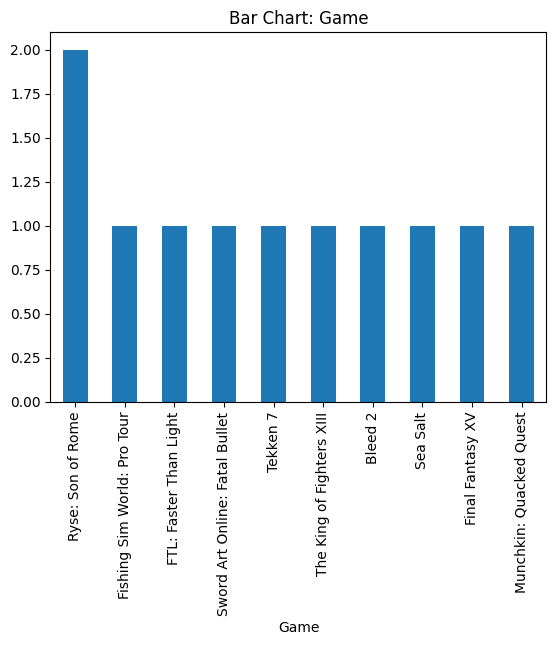

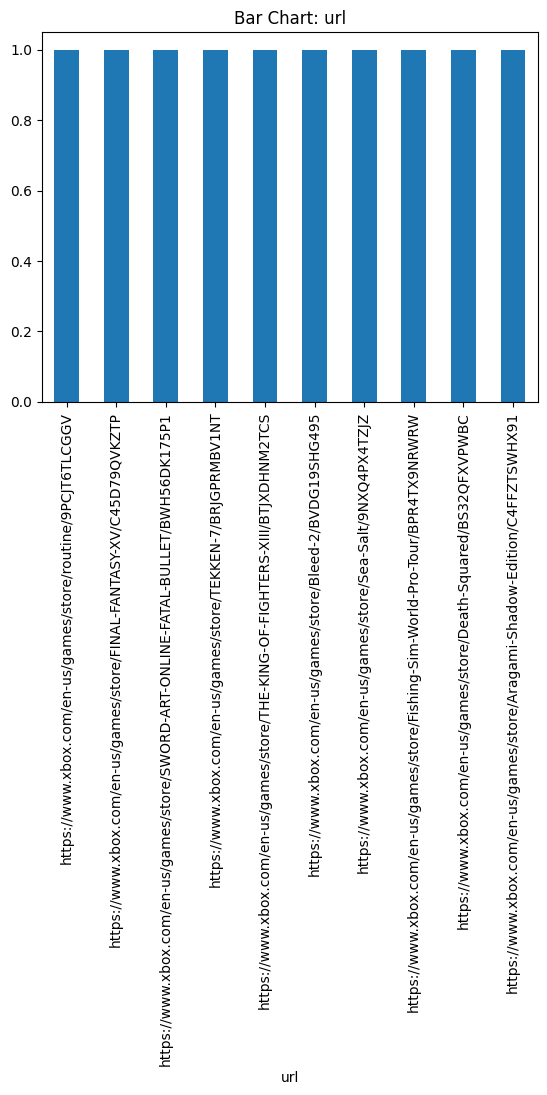

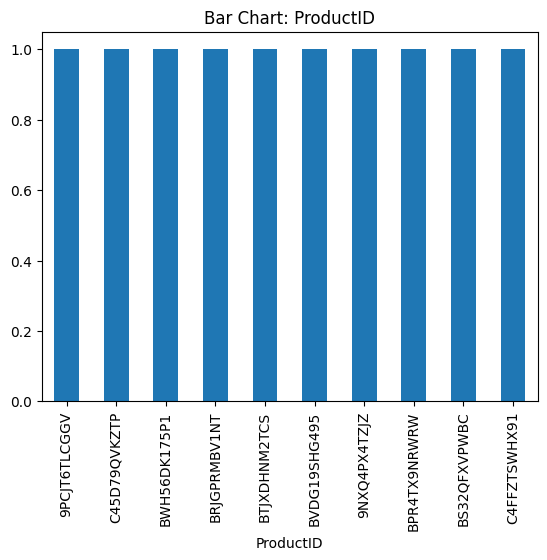

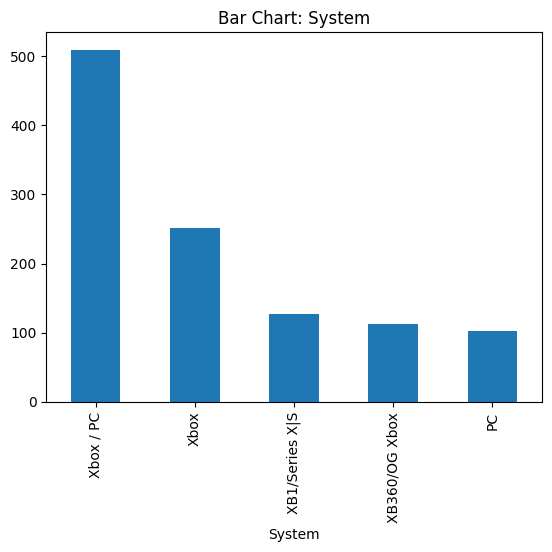

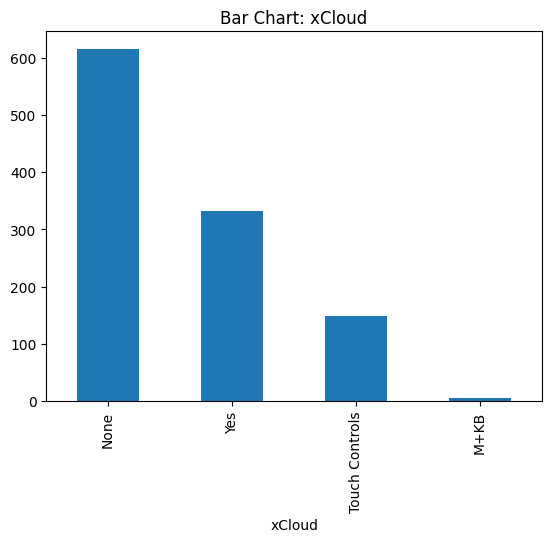

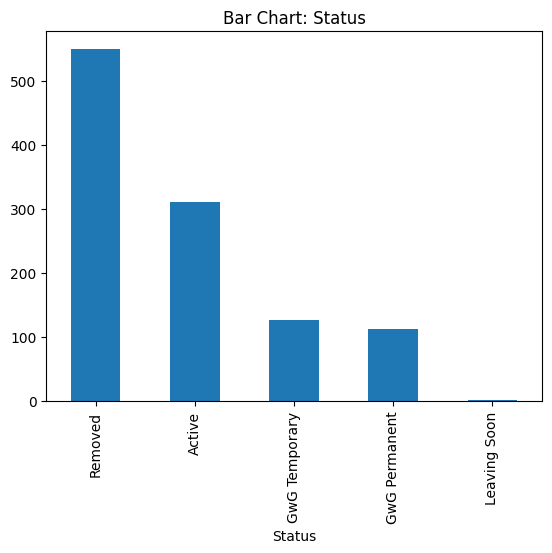

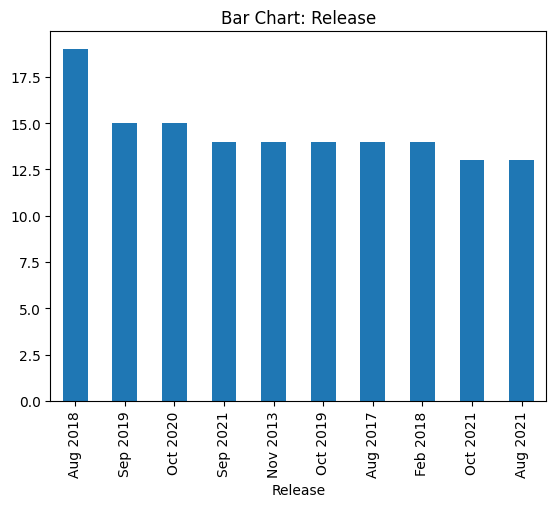

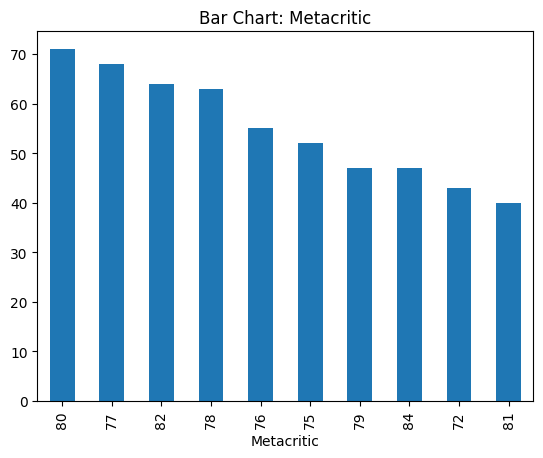

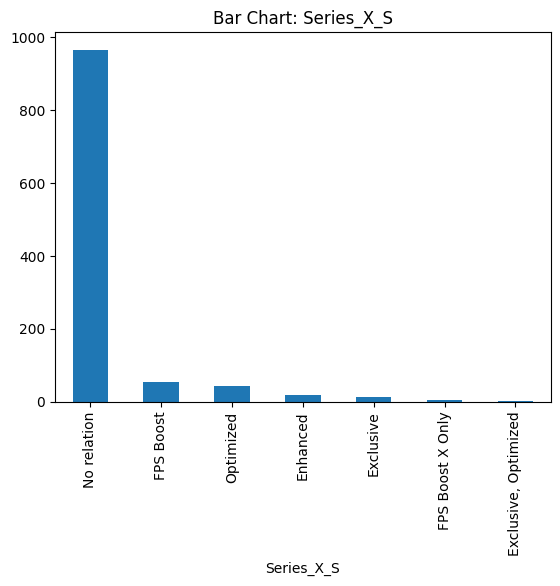

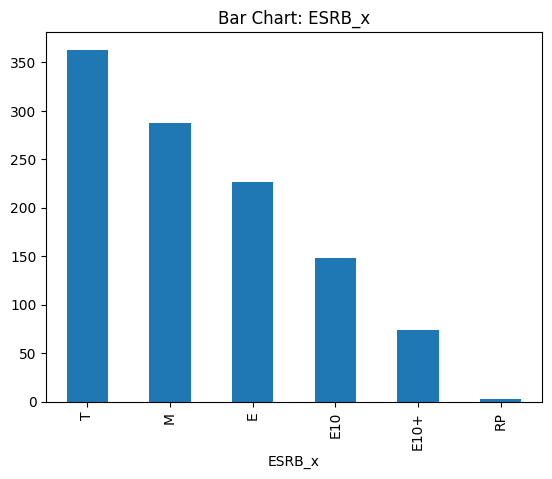

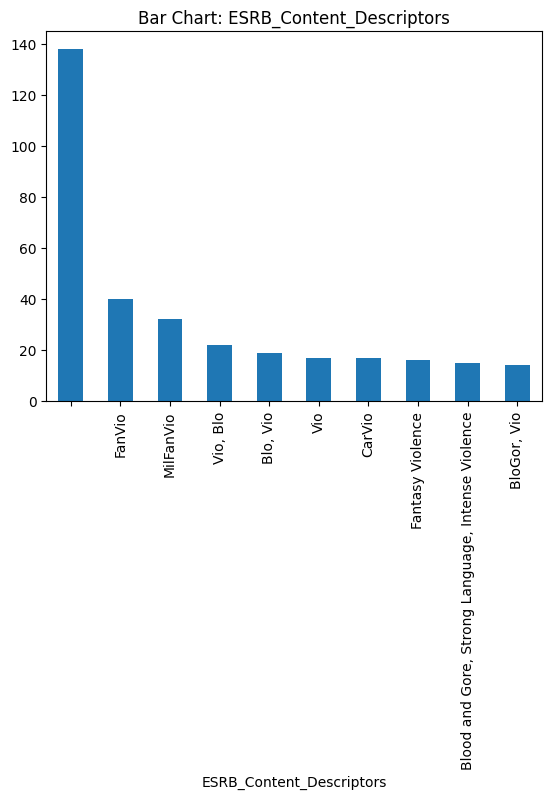

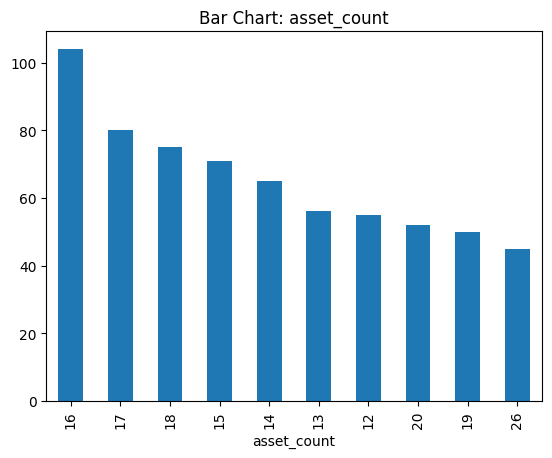

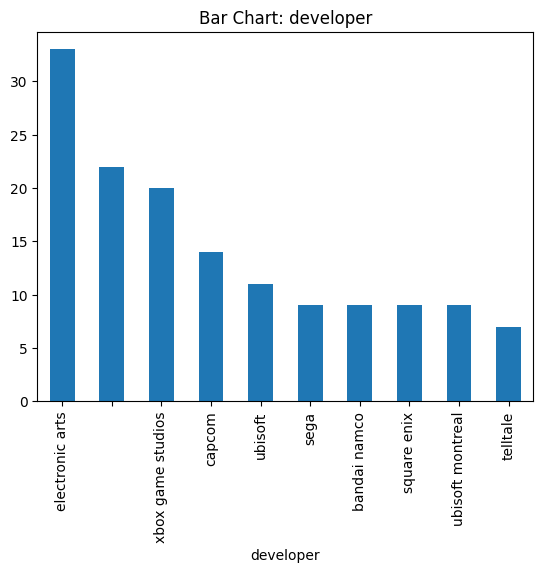

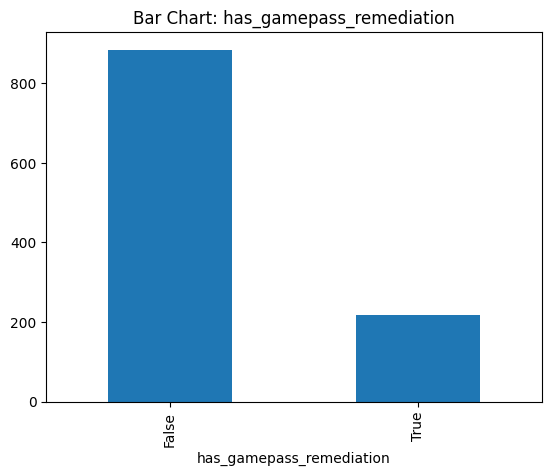

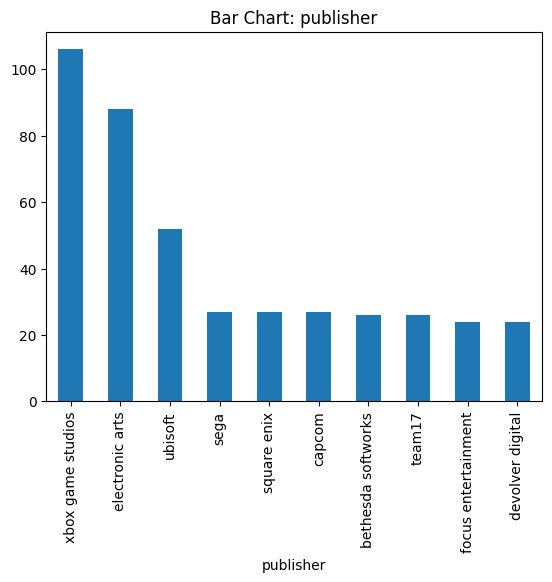

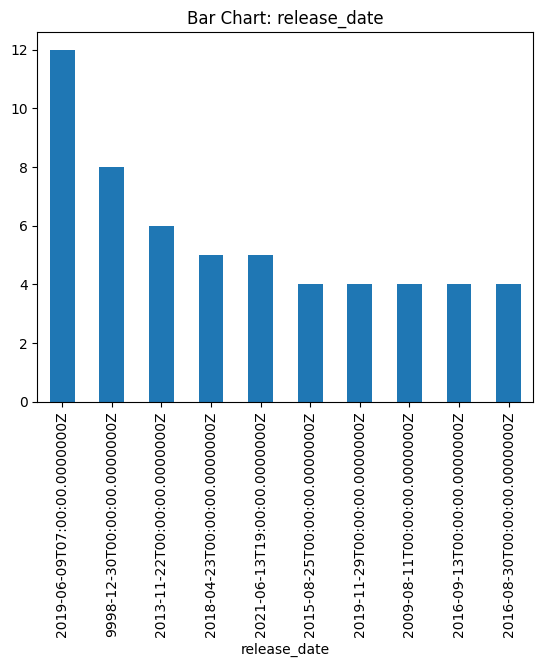

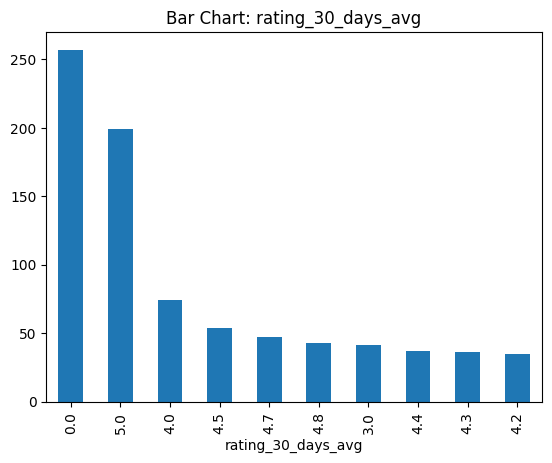

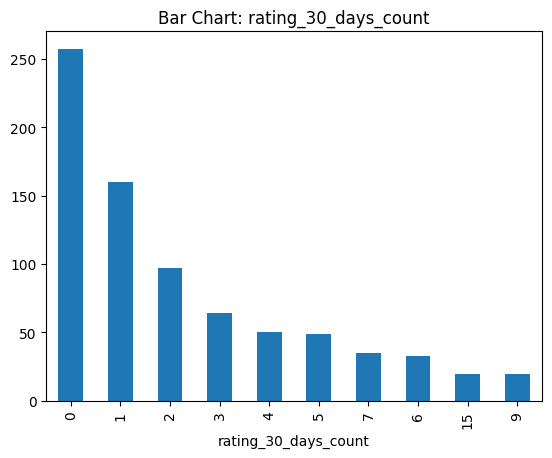

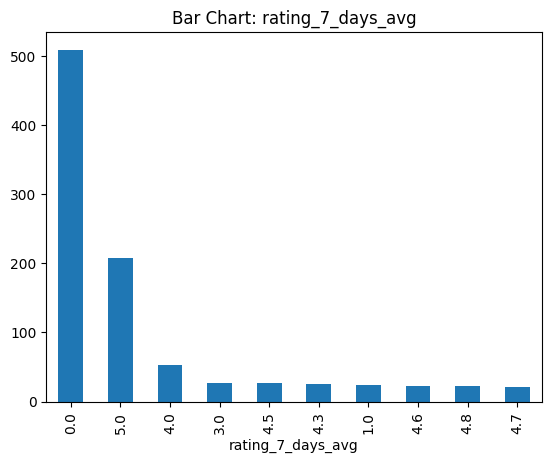

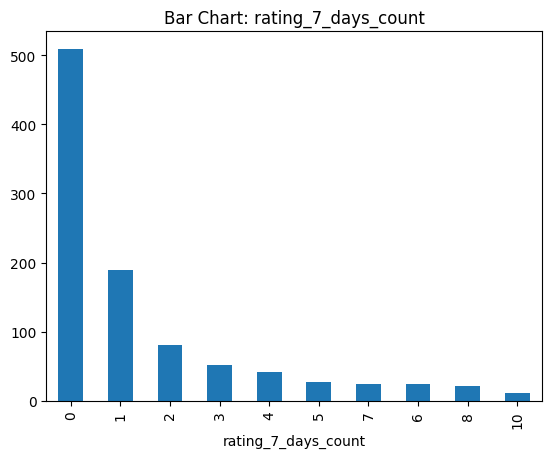

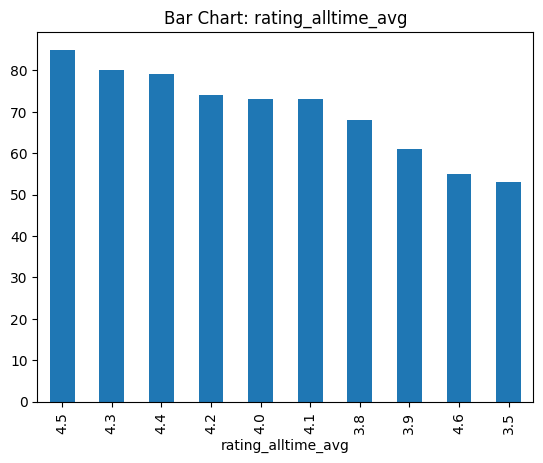

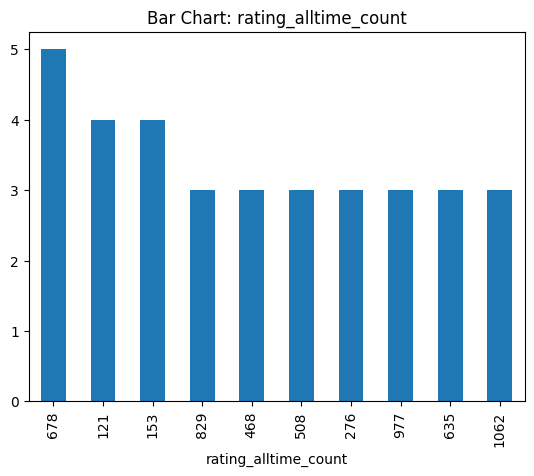

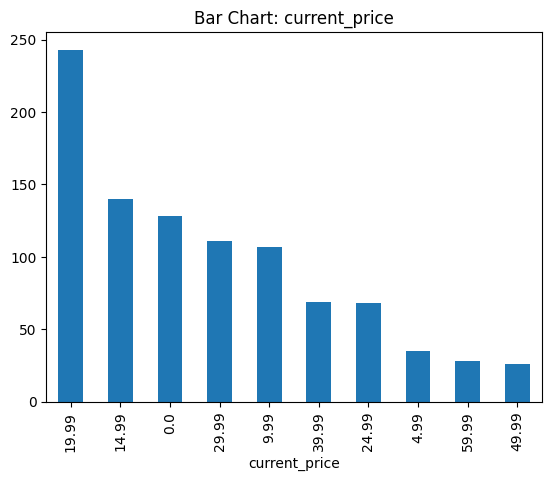

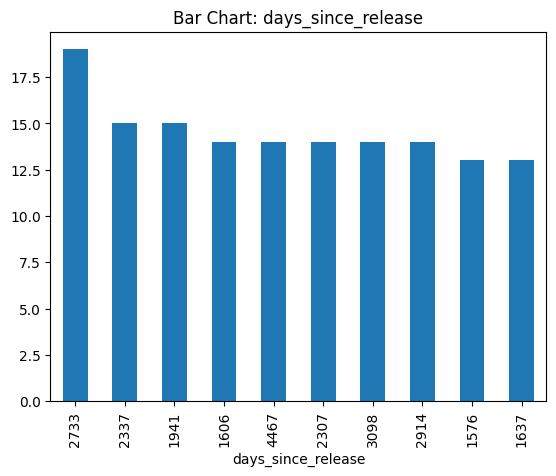

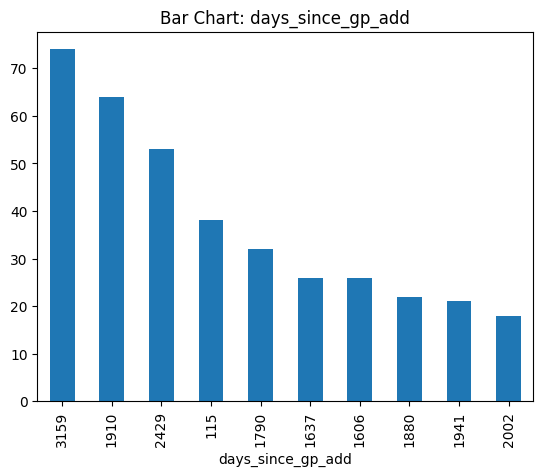

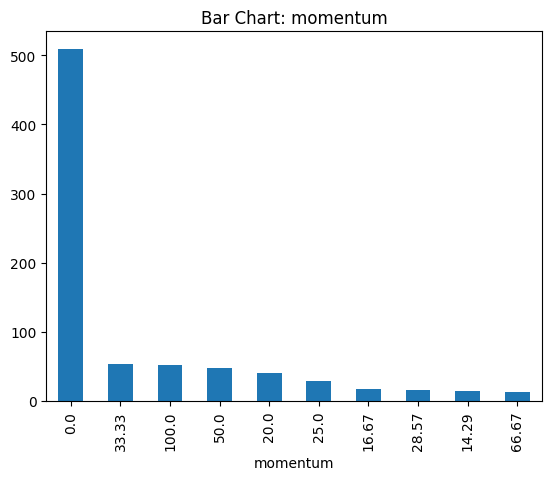

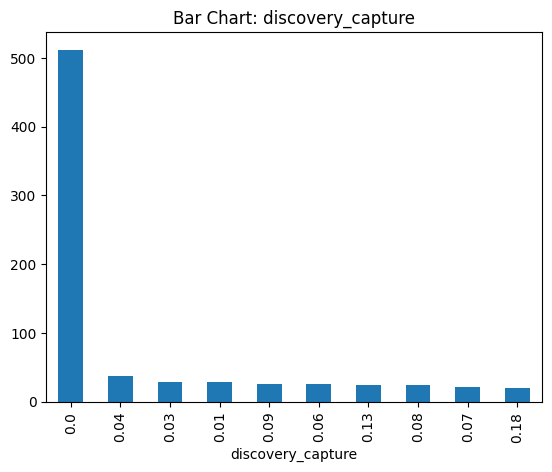

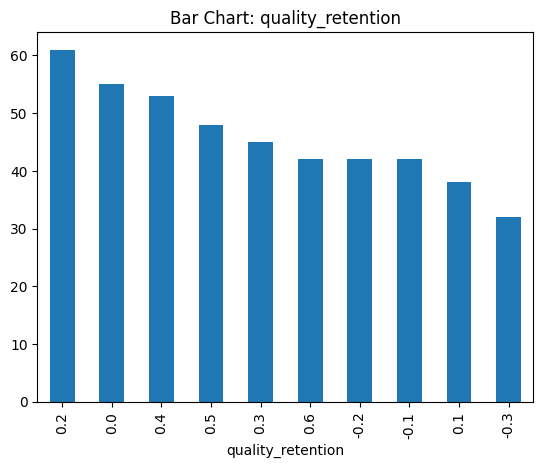

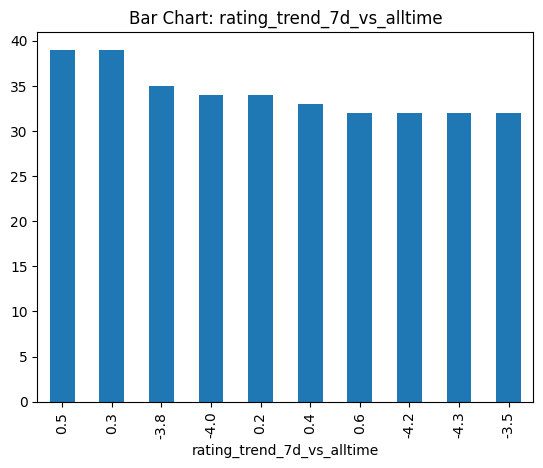

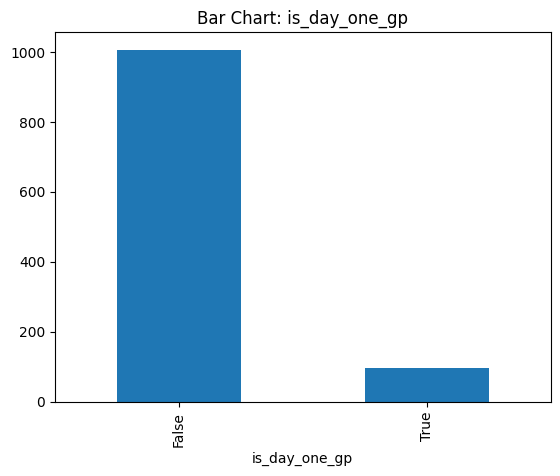

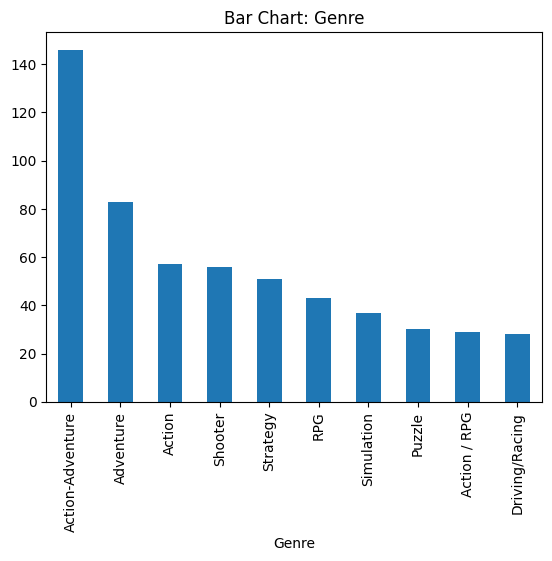

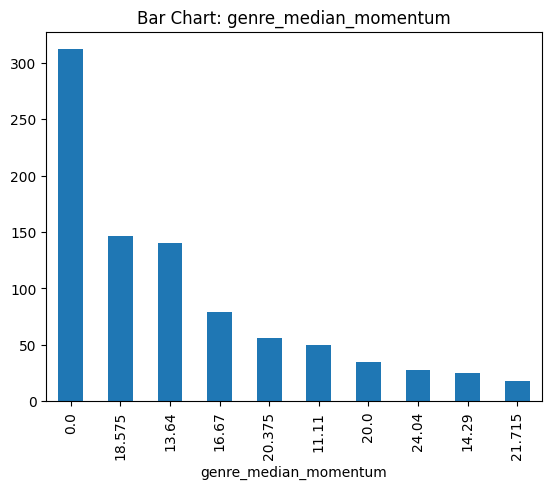

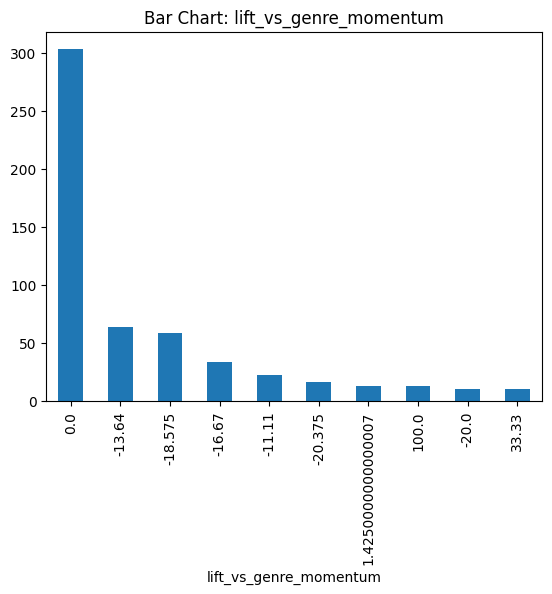

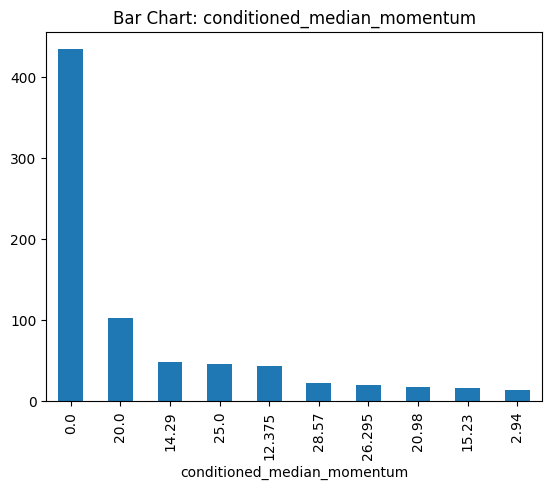

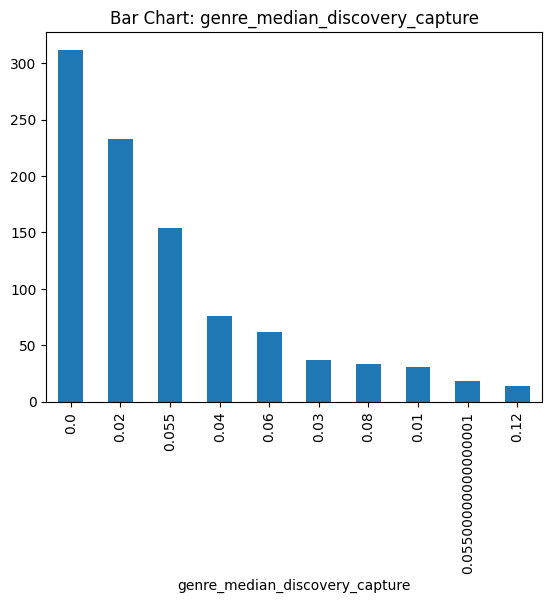

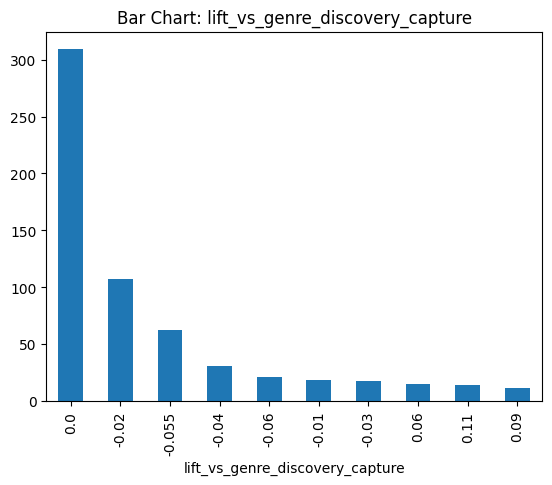

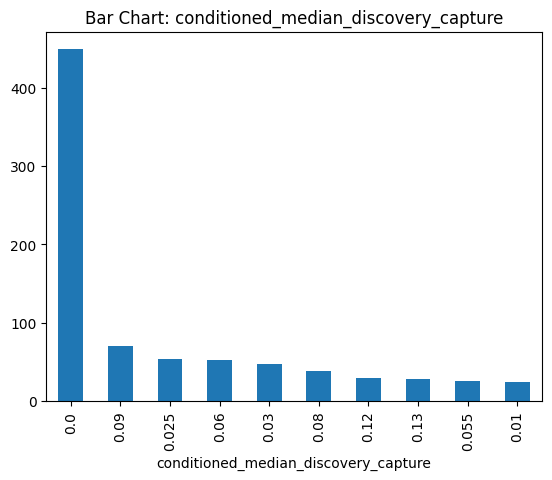

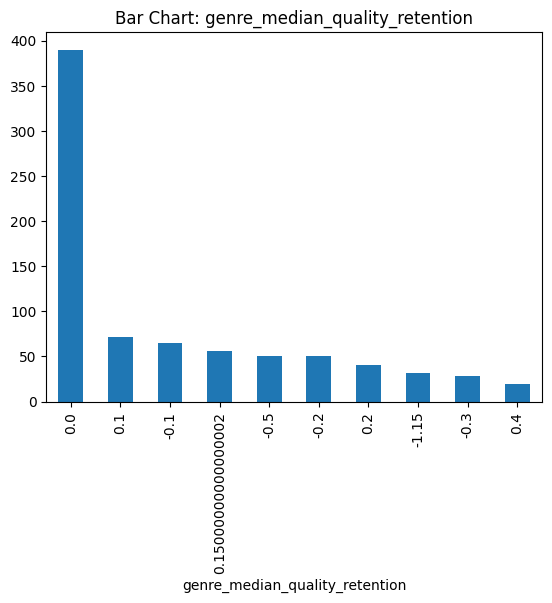

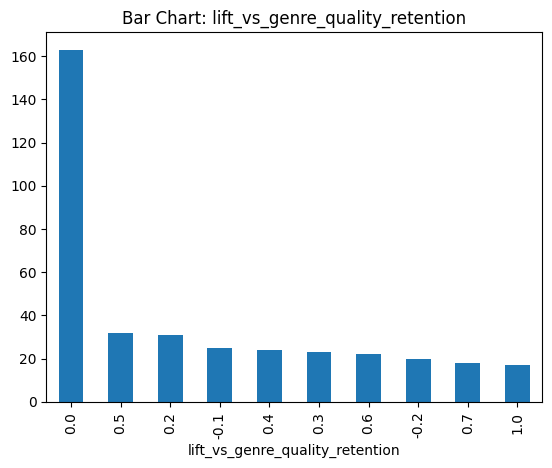

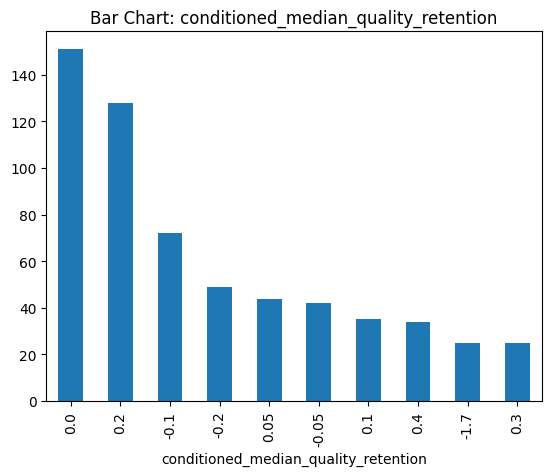

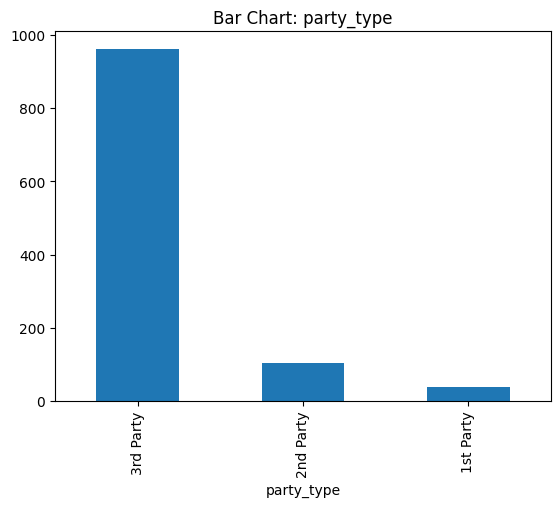

In [22]:
for col in final_df.columns:
    plt.figure()
    final_df[col].dtype == 'object' or final_df[col].nunique() < 10
    final_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    

In [ ]:
final_df_csv['current_price'] = (
    final_df_csv['current_price']
    .astype(str)
    .str.extract(r'(\d+\.\d+|\d+)')
    .astype(float)
)

asset_count                     int64
rating_30_days_avg            float64
rating_30_days.PlayCount      float64
rating_30_days_count            int64
rating_7_days_avg             float64
rating_7_days.PlayCount       float64
rating_7_days_count             int64
rating_alltime_avg            float64
rating_alltime.PlayCount      float64
rating_alltime_count            int64
current_price                 float64
days_since_release              int64
days_since_gp_add               int64
momentum                      float64
discovery_capture             float64
quality_retention             float64
rating_trend_7d_vs_alltime    float64
dtype: object


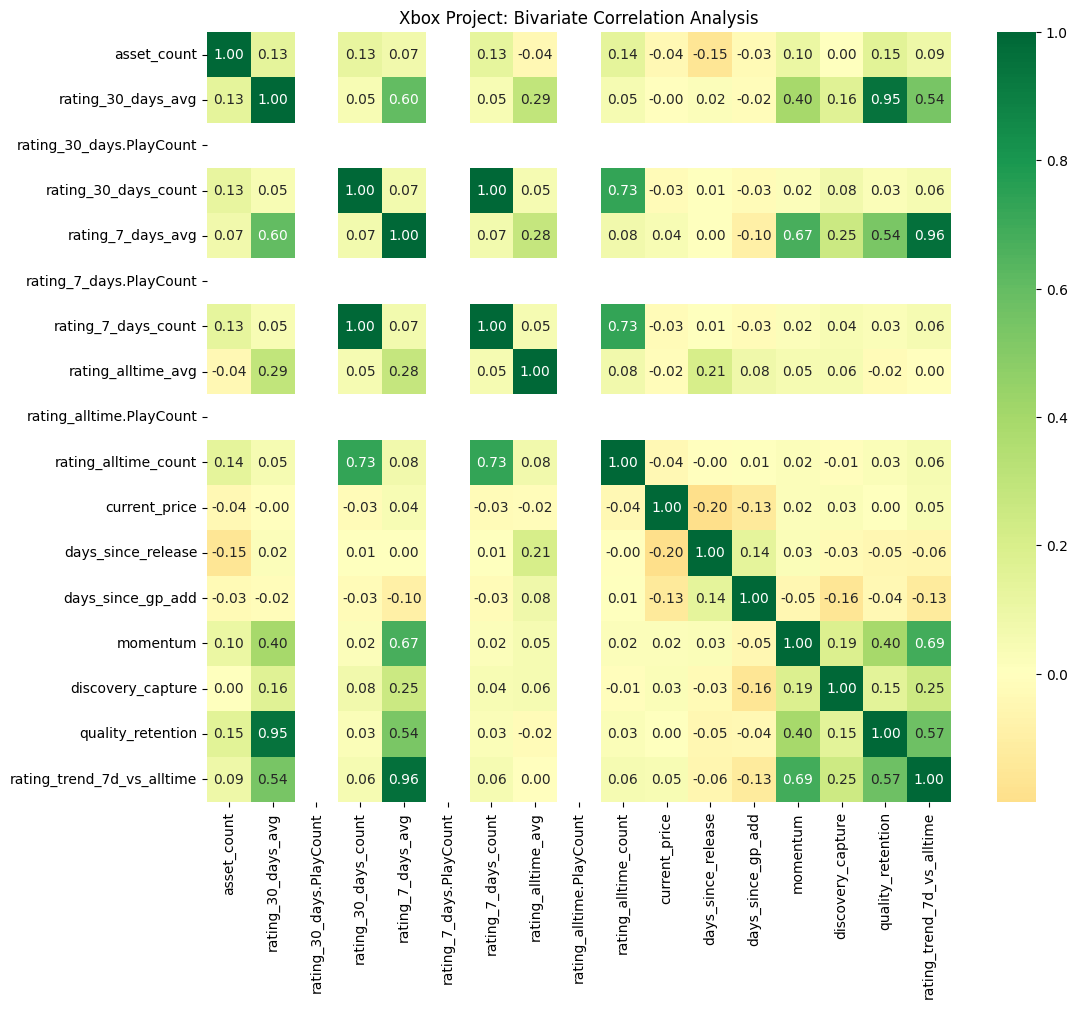

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define your columns
corr_cols = [
    'asset_count', 'rating_30_days_avg', 'rating_30_days.PlayCount', 'rating_30_days_count',
    'rating_7_days_avg', 'rating_7_days.PlayCount', 'rating_7_days_count',
    'rating_alltime_avg', 'rating_alltime.PlayCount', 'rating_alltime_count',
    'current_price', 'days_since_release', 'days_since_gp_add',
    'momentum', 'discovery_capture', 'quality_retention', 'rating_trend_7d_vs_alltime',
]

# 2. FORCE CLEANING: Step-by-step for the price specifically first
# This handles the '$', commas, and extra spaces in one regex sweep
final_df_csv['current_price'] = (
    final_df_csv['current_price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True) # Keep ONLY digits and dots
)

# 3. CONVERT ENTIRE SELECTION TO NUMERIC
# errors='coerce' is the secret—it turns " $ 89.00 " (if it failed) or "tbd" into NaN
for col in corr_cols:
    final_df_csv[col] = pd.to_numeric(final_df_csv[col], errors='coerce')

# 4. VERIFY - If this prints anything other than 'float64', we found the culprit
print(final_df_csv[corr_cols].dtypes)

# 5. RUN CORRELATION
corr_matrix = final_df_csv[corr_cols].corr()

# 6. PLOT
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Xbox Project: Bivariate Correlation Analysis')
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the columns we suspect are highly correlated
feature_candidates = [
    'Metacritic', 'momentum', 'lift_vs_genre_momentum', 
    'discovery_capture', 'lift_vs_genre_discovery_capture', 
    'quality_retention', 'lift_vs_genre_quality_retention',
    'rating_alltime_avg', 'rating_alltime_count', 'current_price', 
    'days_since_release', 'days_since_gp_add'
]

# 2. Preparation: Force numeric (coerce strings like ' $ 89.00 ' to NaN)
df_trial = final_df_csv[feature_candidates].copy()
for col in feature_candidates:
    df_trial[col] = pd.to_numeric(df_trial[col], errors='coerce')

# 3. Impute the gaps (Metacritic, etc.)
# We scale first because KNN depends on distance
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

df_scaled = pd.DataFrame(scaler.fit_transform(df_trial), columns=feature_candidates)
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=feature_candidates)

# 4. Generate the "Truth" Correlation Matrix
trial_corr = df_imputed.corr()

# 5. Visualize the Redundancy
plt.figure(figsize=(12, 10))
sns.heatmap(trial_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Redundancy Check: Trial Pipeline Correlation")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Select only your numerical columns
X = final_df_csv.select_dtypes(include=[np.number]).dropna()

# 2. Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

In [ ]:

sns.pairplot(final_df_csv, 
             vars=['Metacritic', 'momentum', 'discovery_capture', 'quality_retention'],
             hue='party_type', # Colors by 1st party vs 3rd party
             diag_kind='kde',
             plot_kws={'alpha': 0.6})

plt.suptitle('Discovery vs. Quality: Xbox Project Insights', y=1.02)
plt.savefig('xbox_pairplot.png')

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from category_encoders import BinaryEncoder, CountEncoder

# 1. Group your columns based on their data type and cardinality
binary_cols = ['developer', 'publisher']

# Frequency encoding handles the 'popularity' aspect of these categories
freq_cols = ['Genre', 'ESRB_x', 'Status', 'System', 'party_type']

# All your numerical metrics and discovery scores
num_cols = [
    'Metacritic', 'asset_count', 'current_price', 'days_since_release', 
    'days_since_gp_add', 'momentum', 'discovery_capture', 'quality_retention',
    'rating_trend_7d_vs_alltime', 'rating_alltime_avg', 'rating_alltime_count',
    'genre_median_momentum', 'lift_vs_genre_momentum', 'conditioned_median_momentum',
    'genre_median_discovery_capture', 'lift_vs_genre_discovery_capture', 
    'conditioned_median_discovery_capture', 'genre_median_quality_retention',
    'lift_vs_genre_quality_retention', 'conditioned_median_quality_retention'
]

# 2. Define the Preprocessor (The parallel step)
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', BinaryEncoder(), binary_cols),
        ('freq', CountEncoder(normalize=True), freq_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop' # Drops IDs, URLs, and anything else not useful for ML
)

# 3. Combine into a Pipeline (The sequential step)
# This first encodes/scales, then fills the 25 Metacritic gaps
xbox_ml_pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('impute', KNNImputer(n_neighbors=5))
])

# 4. Transform the data
# X_prepared is now a clean NumPy array ready for PCA
X_prepared = xbox_ml_pipeline.fit_transform(final_df_csv)

print(f"Data prepared! Final feature count: {X_prepared.shape[1]}")